# Machine Learning: Regression

## Simple Linear Regression

#### # Importing packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.despine()
plt.rc('figure', figsize=(20,10))
import scipy
%matplotlib inline

#### # Loading Data

In [7]:
ENB = pd.read_excel('ENB2012_data.xlsx')
ENB.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### # Defining the python dictionary

In [18]:
column_names = {'X1':'Relative_Compactness',
                'X2': 'Surface_Area', 
                'X3': 'Wall_Area',
                'X4': 'Roof_Area', 
                'X5': 'Overall_Height', 
                'X6': 'Orientation', 
                'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 
                'Y2': 'Cooling_Load'}
ENB = ENB.rename(columns=column_names)
ENB.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [19]:
ENB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [20]:
ENB.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [21]:
ENB.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### # CREATING A DUMMY DATASET USING SKLEARN MAKE_REGRESSION MODULE

In [11]:
from sklearn.datasets import make_regression
X_predictor, Y_predicate = make_regression(n_features=8, n_samples=768, noise = 5, random_state=42)

#### # let convert is to a dataframe

In [22]:
dummy_ENB = pd.DataFrame(X_predictor, Y_predicate)
dummy_ENB.reset_index()
print('The shape of our dummy dataset is:',dummy_ENB.shape)
dummy_ENB.head()

The shape of our dummy dataset is: (768, 8)


,0,1,2,3,4,5,6,7
-27.068070,0.260322,1.392465,-1.748532,-0.250047,0.793489,0.288694,0.810808,-0.134309
307.128333,1.058729,0.012499,-0.733156,2.868403,0.441307,-1.668599,0.771920,-0.172802
-8.012010,0.472002,-0.580053,-1.237662,0.239405,0.482249,0.499685,0.742682,0.075955
-8.927997,0.367366,-0.877983,-0.271124,-0.826880,1.492689,-0.226479,-0.803179,0.913585
-26.948031,1.355638,0.756989,-1.244655,-0.922165,-0.773789,0.869606,1.876796,0.413435


#### # Let rename our dummy dataset columns to have same like our real dataset

In [24]:
dummy_columns = {0 :'Relative_Compactness',
                1: 'Surface_Area', 
                2: 'Wall_Area',
                3: 'Roof_Area', 
                4: 'Overall_Height', 
                5: 'Orientation', 
                6: 'Glazing_Area', 
                7: 'Glazing_Area_Distribution'}
dummy_ENB = dummy_ENB.rename(columns=dummy_columns)
dummy_ENB.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
-27.068070,0.260322,1.392465,-1.748532,-0.250047,0.793489,0.288694,0.810808,-0.134309
307.128333,1.058729,0.012499,-0.733156,2.868403,0.441307,-1.668599,0.771920,-0.172802
-8.012010,0.472002,-0.580053,-1.237662,0.239405,0.482249,0.499685,0.742682,0.075955
-8.927997,0.367366,-0.877983,-0.271124,-0.826880,1.492689,-0.226479,-0.803179,0.913585
-26.948031,1.355638,0.756989,-1.244655,-0.922165,-0.773789,0.869606,1.876796,0.413435


### # Linearity

#### # To split the data

In [27]:
from sklearn.model_selection import train_test_split 

#### # The model used, it is used for single and multivaraiate

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
# Chosen predictor
X =  ENB[['Relative_Compactness']] 
#target variable, you can set multiple predictors or target varaiables
y=  ENB[['Heating_Load']] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

LR = LinearRegression()
LR.fit(X_train, y_train)

# the predicted vriable
Y_pred= LR.predict(X_test) 
print(Y_pred[:10])

[[13.65652995]
 [16.0375964 ]
 [35.08612796]
 [23.77606234]
 [14.84706318]
 [25.56186218]
 [35.08612796]
 [35.08612796]
 [14.84706318]
 [30.32399507]]


Text(0, 0.5, 'Predicted Values')

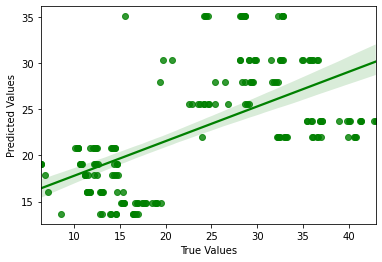

In [33]:
# Plot outputs
sns.regplot(x= y_test,y= Y_pred,color ='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [37]:
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LinearRegression #the model used, it is used for single and multivaraiate

Xd =  dummy_ENB[['Relative_Compactness']] #chosen predictor
yd =  Y_predicate #target variable, you can set multiple predictors or target varaiables

X_trainD,X_testD,y_trainD,y_testD = train_test_split(Xd,yd,test_size=0.25,random_state = 42)

LRD = LinearRegression()
LRD.fit(X_trainD, y_trainD)

Y_predD = LRD.predict(X_testD) # the predicted vriable
print(Y_pred[:5])

[[13.65652995]
 [16.0375964 ]
 [35.08612796]
 [23.77606234]
 [14.84706318]]


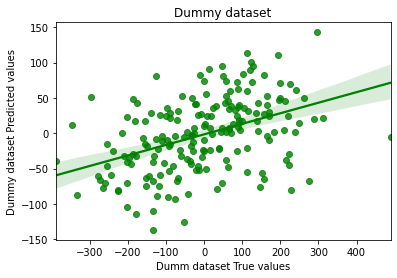

In [38]:
#let do a regplot for the True value and predicted values for dummy dataset
sns.regplot(x = y_testD, y = Y_predD, color= 'green')
plt.xlabel('Dumm dataset True values')
plt.ylabel('Dummy dataset Predicted values')
plt.title('Dummy dataset')
plt.show()

### # Homoscedasticity

Text(0.5, 1.0, 'Energy efficiency dataset')

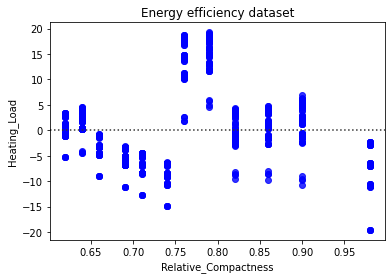

In [40]:
#let visualize this using residual plot in sns
sns.residplot(x = X, y = y, color= 'blue', data = ENB)
plt.title('Energy efficiency dataset')

Text(0.5, 1.0, 'Dummy dataset')

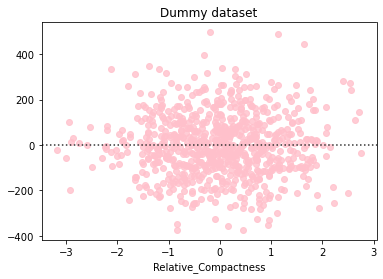

In [42]:
#Let do residual plot for our dummy dataset. As expected, our dummy dataset obeyed assumption 2 unlike our energy efficiency 
#dataset
sns.residplot(x = Xd, y = yd, data = dummy_ENB, color='pink')
plt.title('Dummy dataset')

### # Normality

Text(0.5, 1.0, 'Energy efficiency dataset')

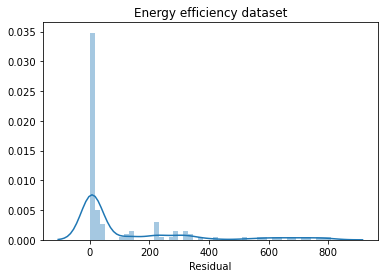

In [43]:
#let do a distplot from sns to visualize this assumption
sns.distplot(ENB)
plt.xlabel('Residual')
plt.title('Energy efficiency dataset')

Text(0.5, 1.0, 'Dummy dataset')

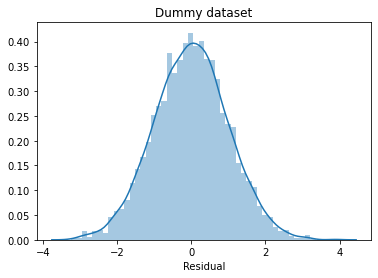

In [44]:
sns.distplot(dummy_ENB)
plt.xlabel('Residual')
plt.title('Dummy dataset')

### # Residuals

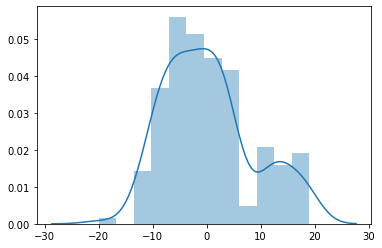

In [45]:
#FOR ENERGY DATASET
floored_1 = pd.DataFrame(np.floor(y_test))
floored_2 = pd.DataFrame(np.floor(Y_pred))
floored_1.reset_index(drop=True,inplace=True)
floor = floored_1["Heating_Load"]-floored_2[0]
sns.distplot(floor)

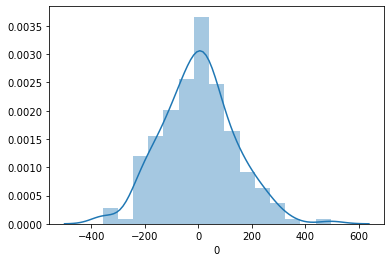

In [46]:
#FOR DUMMY DATASET
floored_3 = pd.DataFrame(np.floor(y_testD))
floored_4 = pd.DataFrame(np.floor(Y_predD))
floored_3.reset_index(drop=True,inplace=True)
floored_dummy = floored_3[0]-floored_4[0]
sns.distplot(floored_dummy)

# Measuring Regression Performance

### # Multiple Linear regression

In [47]:
# Firstly, we normalise our dataset to a common scale using the min max scaler, 
# this makes the model more efficient i personally did not do this in this in my ealrier model.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_ENB = pd.DataFrame(scaler.fit_transform(ENB), columns = ENB.columns)
features_ENB = normalised_ENB.drop(columns = ['Heating_Load', 'Cooling_Load'])
heating_target = normalised_ENB['Heating_Load']

#in this they are using heating load as target, previously all the graphs were plotted with the cooling load
#Now, we split our dataset into the training and testing dataset. 
#Recall that we had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_tests = train_test_split(features_ENB, heating_target,test_size=0.3, random_state=1)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#### # Mean Absolute Error (MAE)

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_tests, predicted_values)
round(mae, 3)

0.063

#### # Residual Sum of Squares (RSS)

In [49]:
y_test6=np.array(y_tests)
predicted_values6= np.array(predicted_values)
rss = np.sum(np.square(y_test6-predicted_values6))
round(rss,3)

1.832

#### # Root Mean Square Error (RMSE)

In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_tests, predicted_values))
round(rmse, 3)

0.089

#### # R-Squared

In [51]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_tests, predicted_values)
round(r2_score, 3)

0.893

# Penalization Methods

In [52]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

#### # The LASSO Regression 

In [54]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

#### # Elastic Net

In [55]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.0001)
regr.fit(x_train, y_train)

ElasticNet(alpha=0.0001)

In [56]:
# comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
elastic_weights_df = get_weights_df(regr, x_train, 'elastic_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elastic_weights_df, on='Features')

In [57]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,elastic_weight
0,Surface_Area,-4.078218e+12,-0.062275,0.000000,-0.061229
1,Relative_Compactness,-5.822017e-01,-0.283471,-0.027719,-0.463949
2,Orientation,2.368927e-03,0.003369,0.000000,0.003016
3,Glazing_Area_Distribution,2.864528e-02,0.029088,0.021431,0.028018
4,Glazing_Area,2.159252e-01,0.212449,0.206132,0.214199
5,Overall_Height,3.930664e-01,0.442467,0.463482,0.423507
6,Wall_Area,2.378960e+12,0.103061,0.200087,-0.000000
7,Roof_Area,3.058663e+12,-0.163192,-0.000000,-0.318575


# Non-Linear Regression Methods and Other Recommendations

### # Grid Search

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
#let create values or parametres we want to run grid search on. Let run on alpha as use in this tutorial
alpha = [0.0001, 0.00015, 0.00016, 0.0002, 0.001, 0.003]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
Grid = GridSearchCV(estimator=ElasticNet(max_iter=100000), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = Grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   29.7s finished


Best Score:  0.9222111001545361
Best Params:  {'alpha': 0.0001, 'l1_ratio': 0}


c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4918868820804265, tolerance: 0.003944969110754325
  model = cd_fast.enet_coordinate_descent(


#### # Random Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV

l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
alpha = [0.0001, 0.003, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #searches values randomly among these
max_iter=100000

param_dist = dict(l1_ratio=l1_ratio,alpha=alpha)

Random_search = RandomizedSearchCV(estimator=ElasticNet(max_iter=100000),param_distributions = param_dist,random_state=0)
result = Random_search.fit(x_train, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.220818979689996, tolerance: 0.003146270883157026
  model = cd_fast.enet_coordinate_descent(
c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1858433960116415, tolerance: 0.0032101700982193095
  model = cd_fast.enet_coordinate_descent(
c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.235065472359182, tolerance: 0.0031758795041326245
  model = cd_fast.enet_coordi

Best Score:  0.9221276638464708
Best Params:  {'l1_ratio': 0, 'alpha': 0.00016}


c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5012484515891027, tolerance: 0.003944969110754325
  model = cd_fast.enet_coordinate_descent(
